# The AI control system for a transimission control unit

## A feed forward neural network trained using Genitic Algorithm

In [109]:
%load_ext autoreload
%autoreload 2
from scipy import io
from scipy.interpolate import interpolate
import numpy as np
import matplotlib.pyplot as plt
from AwesomeVehicle import PHEV
import Utilities_PHEV as UT
#from PHEV_Anup import PHEV
#import Utilities_Anup as UT
import keras.backend as K 
import keras
from keras.callbacks import TensorBoard
from keras.models import load_model
from GA import GA
import datetime
import seaborn as sns
d = io.loadmat('dan2.mat')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
model,modelPython = UT.Create_Model(6,[8,6,5],5)

y = model.get_weights()
tensor_board = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________


In [3]:
velFile = r'D:\Master Thesis\project tech files\Final Files\17_05_phev\NEDC_mps_SingleCycle.dat'
d = np.loadtxt(velFile)[:,:1]

In [4]:
vhc = PHEV(velFile,modelPython,{'SOC_init':50,'SOC_min':10})
vhc.RunSimulation()


completed simulation 11013.228000000074 50.922931819612764


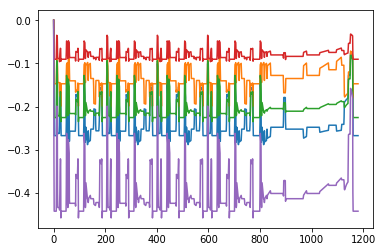

In [5]:
for ii in range(vhc.outputNN.shape[-1]):
    plt.plot(vhc.outputNN[:,ii])

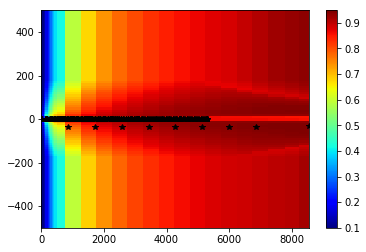

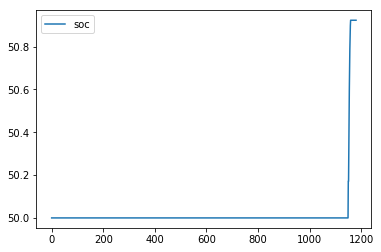

In [5]:
xx,yy = np.meshgrid(np.linspace(0,vhc.emRPM.max(),200),np.linspace(-500,500,100))
plt.pcolor(xx,yy,vhc.MotorMap(xx.ravel(),yy.ravel()).reshape(xx.shape),cmap='jet')
plt.colorbar()
plt.plot(vhc.emRPM,vhc.emTorque,'*k')

plt.figure(5)
#plt.plot(vhc.emEff*100,label='eff')
#plt.plot(vhc.emTorque,label='torque')
#plt.plot(vhc.emRPM/100,label='rpm')
plt.plot(vhc.soc,label='soc')
#plt.plot(vhc.mode,label='mode')
#plt.plot(vhc.mode,label='mode')
plt.legend()

22837.043907681178

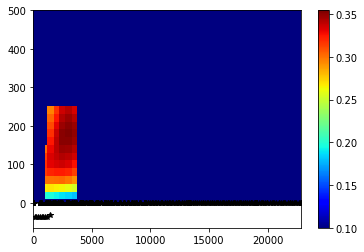

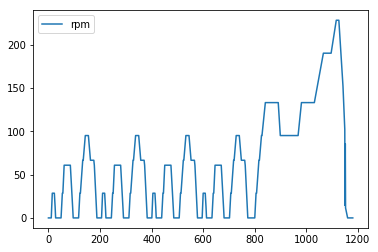

In [6]:
xx,yy = np.meshgrid(np.linspace(0,vhc.engRPM.max(),200),np.linspace(0,500,100))
plt.pcolor(xx,yy,vhc.EngineMap(xx.ravel(),yy.ravel()).reshape(xx.shape),cmap='jet')
plt.colorbar()
plt.plot(vhc.engRPM,vhc.emTorque,'*k')
plt.figure(5)
# plt.plot(vhc.engEff*100,label='eff')
# plt.plot(vhc.engTorque,label='torque')
plt.plot(vhc.engRPM/100,label='rpm')

plt.legend()
vhc.engRPM.max()


In [8]:
# plt.plot(vhc.time,vhc.whlSpeed[1000]*(vhc.gearRatios[vhc.engGear[1000]])*60)

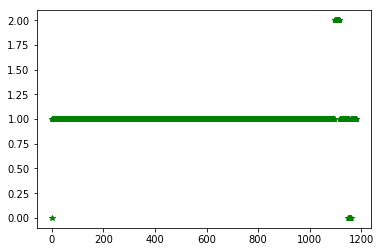

In [7]:
# plt.plot(vhc.mode)
plt.plot(vhc.mode,'g*')

In [8]:
vhc.energyEm.sum()/vhc.batteryEnergy

-0.00922931819612765

In [9]:
vhc.fuelFlow.sum()*100/(vhc.x[-1]*1e-3)

13.525941927740673

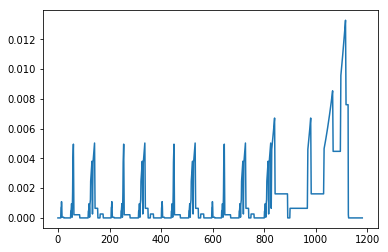

In [10]:
plt.plot(vhc.fuelFlow)

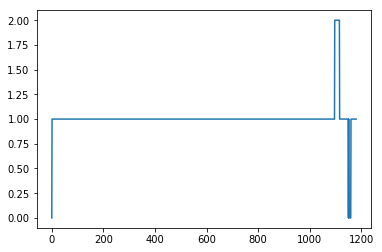

In [11]:
plt.plot(vhc.mode)

In [14]:
vehicleForGA = PHEV(velFile,modelPython,{'SOC_init':15,'SOC_target':15,'SOC_min':10})#'SOC_init':50,'SOC_target':95,'SOC_min':10
NNO = []
maxGenerations = 800
configGA = {'maxGenerations':maxGenerations,'nGenesVar':20,'tournamentSelectionParameter':0.7,
           'populationSize':100,'tournamentSize':2, 'nEliteCopies':1,
            'crossoverProbability':0.8,'mutationMultiplier':1,'restartOptimization':False,
            'nJobs':8
           }
ga = GA(configGA)

w = np.array(UT.GetWeightsArray(vehicleForGA.ControllerNN.get_weights()))
varRange = [(-1,1)]*w.size
fToOptimize = UT.VehicleToOptimizeForGA(vehicleForGA)

Restarting
Generation 0 | OF mean 7.223e+02 | Best OF 5.131e+00


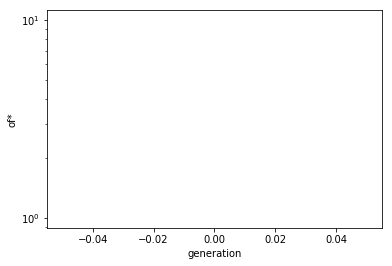

Generation 10 | OF mean 7.217e+02 | Best OF 5.103e+00


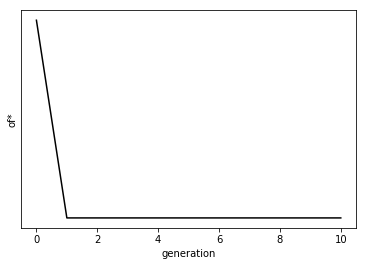

Generation 20 | OF mean 6.724e+02 | Best OF 3.513e+00


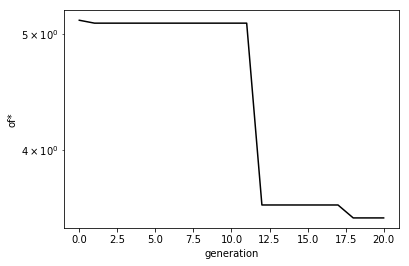

Generation 30 | OF mean 6.819e+02 | Best OF 3.479e+00


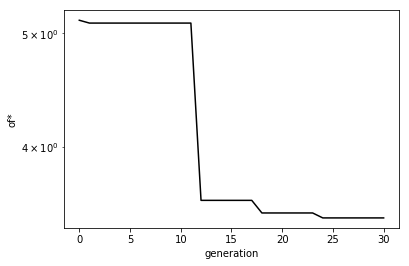

Generation 40 | OF mean 7.115e+02 | Best OF 3.257e+00


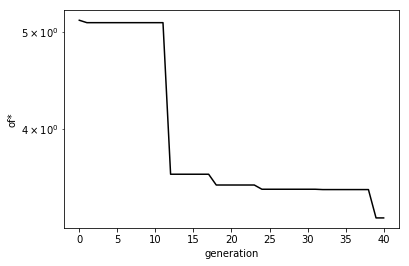

Generation 50 | OF mean 6.713e+02 | Best OF 3.257e+00


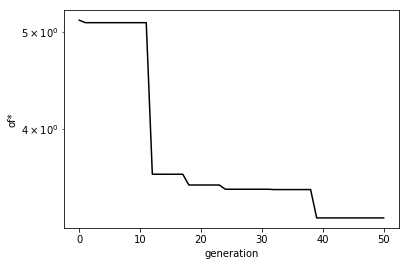

Generation 60 | OF mean 6.815e+02 | Best OF 3.257e+00


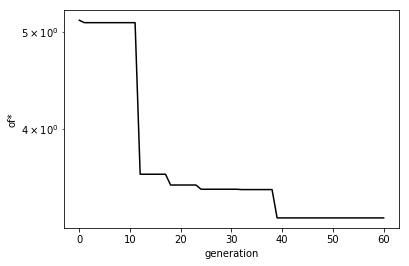

Generation 70 | OF mean 7.011e+02 | Best OF 3.190e+00


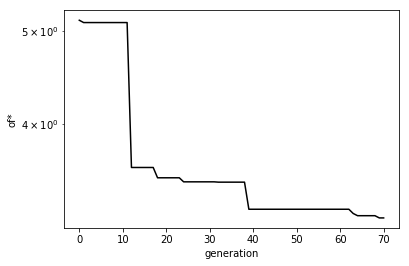

Generation 80 | OF mean 7.113e+02 | Best OF 3.155e+00


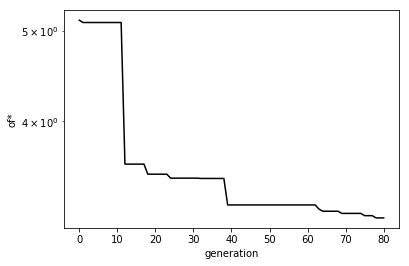

Generation 90 | OF mean 7.012e+02 | Best OF 3.155e+00


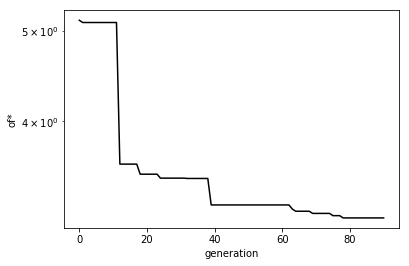

Generation 100 | OF mean 7.409e+02 | Best OF 3.155e+00


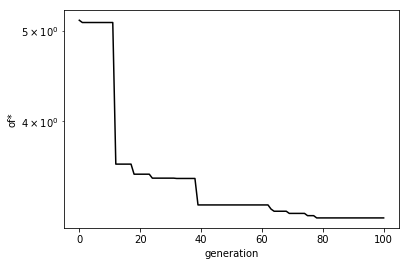

Generation 110 | OF mean 7.609e+02 | Best OF 3.155e+00


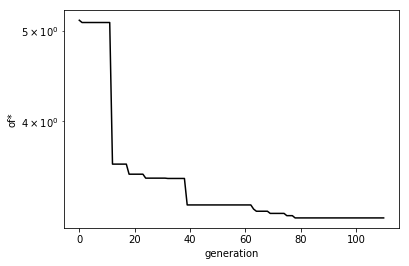

Generation 120 | OF mean 7.010e+02 | Best OF 3.120e+00


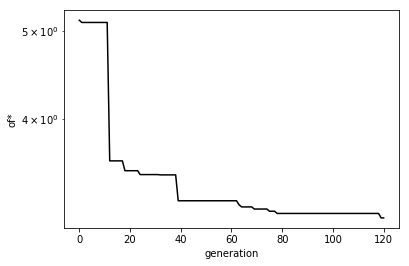

Generation 130 | OF mean 6.613e+02 | Best OF 3.108e+00


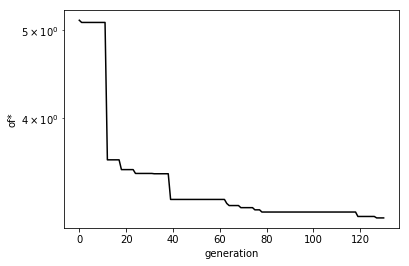

Generation 140 | OF mean 7.009e+02 | Best OF 3.105e+00


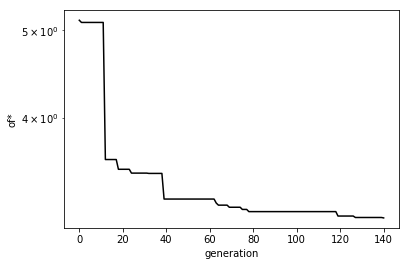

Generation 150 | OF mean 7.408e+02 | Best OF 2.996e+00


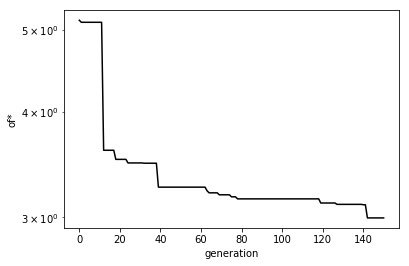

Generation 160 | OF mean 7.902e+02 | Best OF 2.987e+00


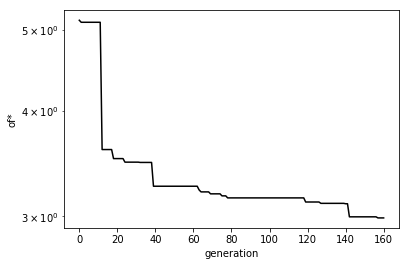

Generation 170 | OF mean 7.110e+02 | Best OF 2.987e+00


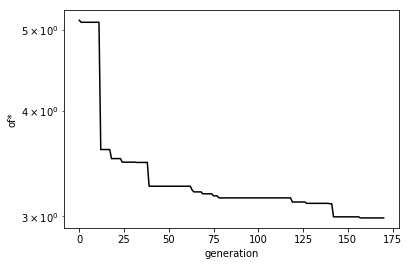

Generation 180 | OF mean 7.009e+02 | Best OF 2.987e+00


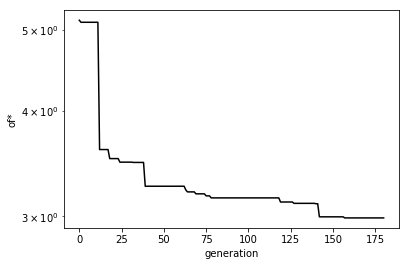

Generation 190 | OF mean 5.917e+02 | Best OF 2.987e+00


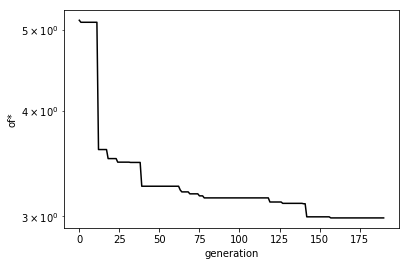

Generation 200 | OF mean 6.015e+02 | Best OF 2.960e+00


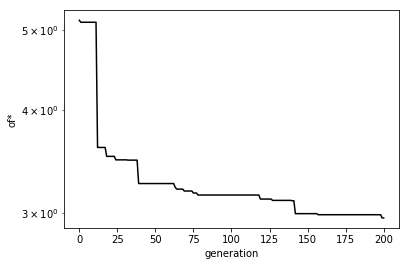

Generation 210 | OF mean 6.311e+02 | Best OF 2.936e+00


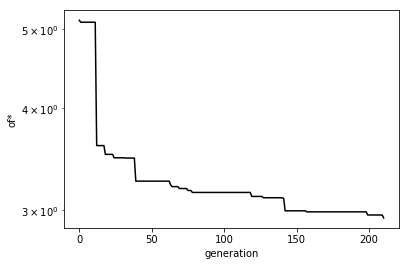

Generation 220 | OF mean 6.909e+02 | Best OF 2.864e+00


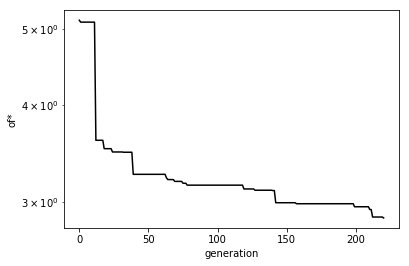

Generation 230 | OF mean 6.611e+02 | Best OF 2.855e+00


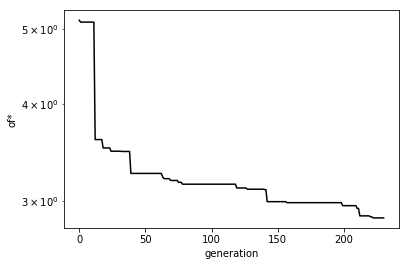

Generation 240 | OF mean 7.206e+02 | Best OF 2.855e+00


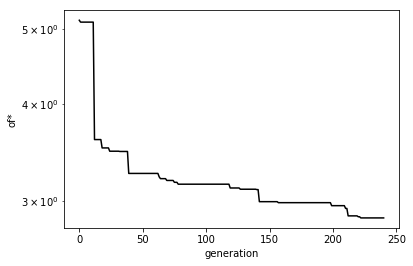

Generation 250 | OF mean 7.106e+02 | Best OF 2.852e+00


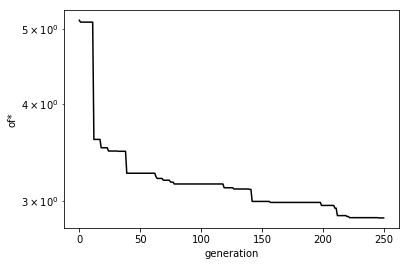

Generation 260 | OF mean 7.207e+02 | Best OF 2.845e+00


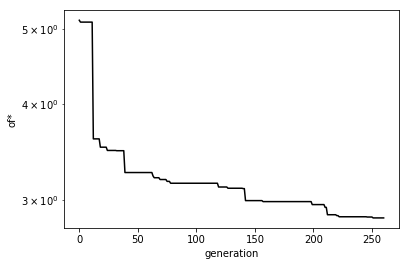

Generation 270 | OF mean 6.810e+02 | Best OF 2.777e+00


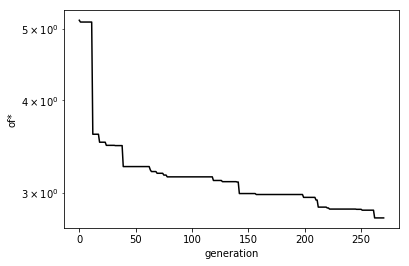

Generation 280 | OF mean 6.309e+02 | Best OF 2.772e+00


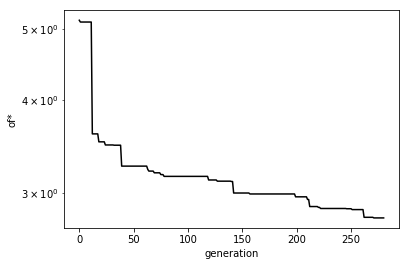

Generation 290 | OF mean 5.912e+02 | Best OF 2.765e+00


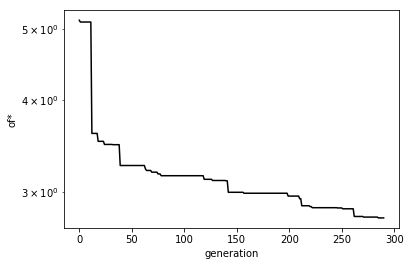

Generation 300 | OF mean 6.412e+02 | Best OF 2.735e+00


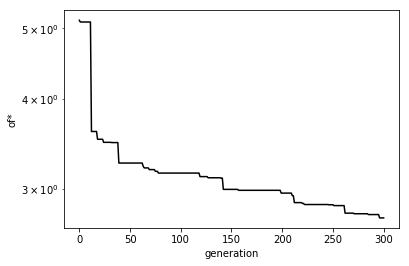

Generation 310 | OF mean 6.608e+02 | Best OF 2.669e+00


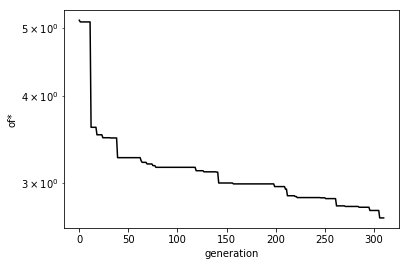

Generation 320 | OF mean 7.006e+02 | Best OF 2.669e+00


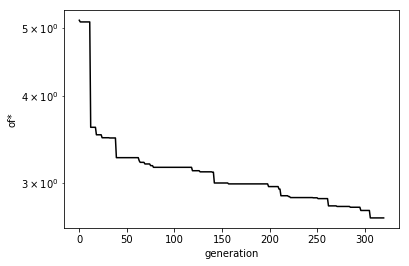

Generation 330 | OF mean 5.215e+02 | Best OF 2.660e+00


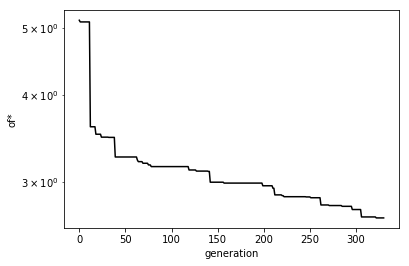

Generation 340 | OF mean 6.508e+02 | Best OF 2.632e+00


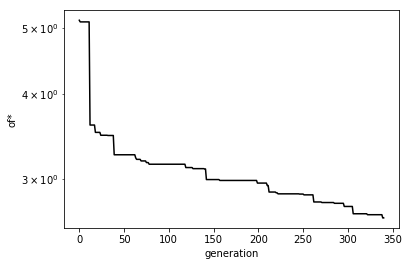

Generation 350 | OF mean 5.814e+02 | Best OF 2.628e+00


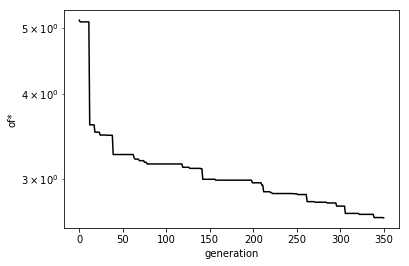

Generation 360 | OF mean 6.310e+02 | Best OF 2.628e+00


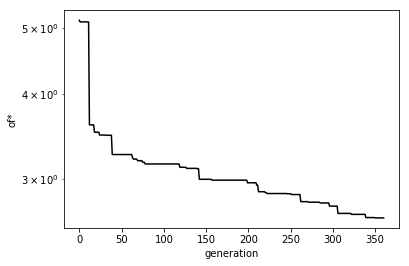

Generation 370 | OF mean 6.210e+02 | Best OF 2.628e+00


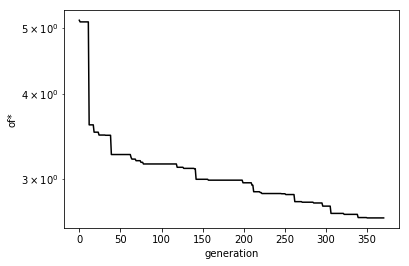

Generation 380 | OF mean 5.913e+02 | Best OF 2.628e+00


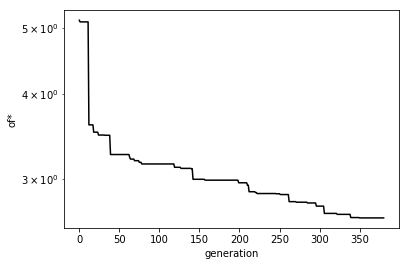

Generation 390 | OF mean 6.309e+02 | Best OF 2.628e+00


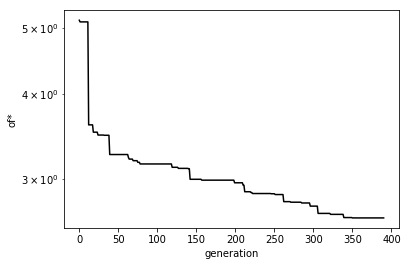

Generation 400 | OF mean 5.016e+02 | Best OF 2.628e+00


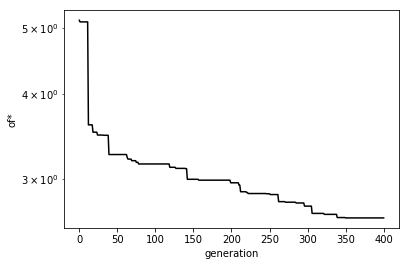

Generation 410 | OF mean 6.012e+02 | Best OF 2.616e+00


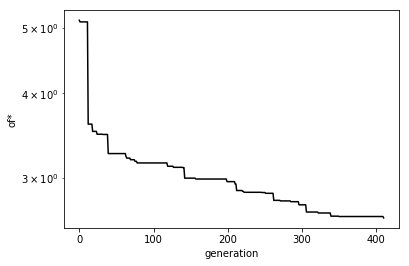

Generation 420 | OF mean 5.316e+02 | Best OF 2.616e+00


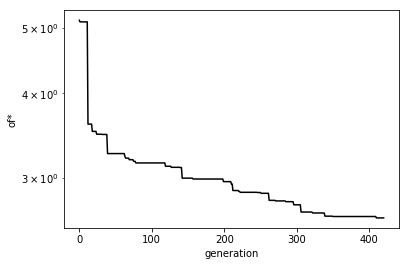

Generation 430 | OF mean 5.314e+02 | Best OF 2.612e+00


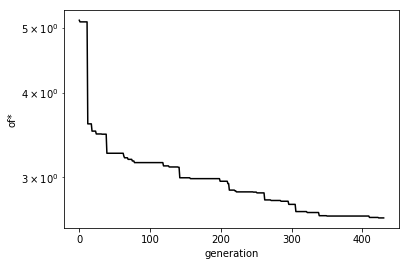

Generation 440 | OF mean 6.212e+02 | Best OF 2.612e+00


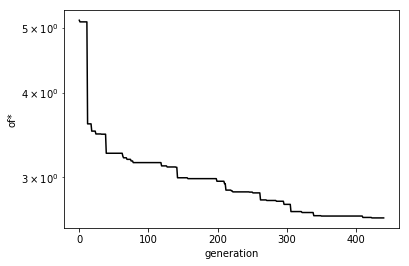

Generation 450 | OF mean 7.503e+02 | Best OF 2.612e+00


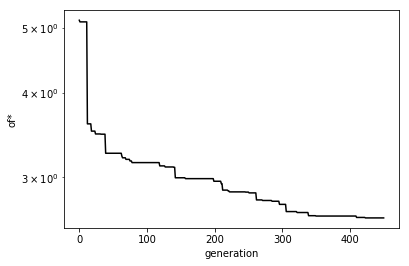

Generation 460 | OF mean 6.210e+02 | Best OF 2.612e+00


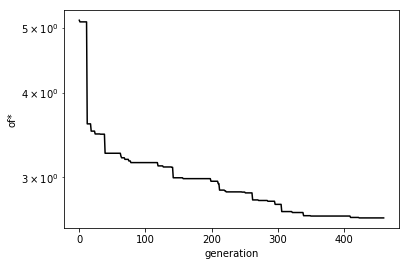

Generation 470 | OF mean 6.707e+02 | Best OF 2.612e+00


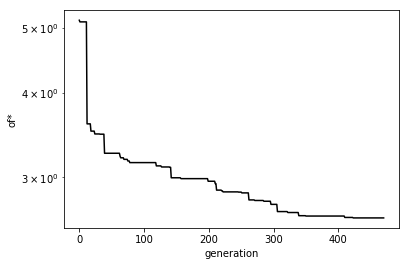

Generation 480 | OF mean 6.608e+02 | Best OF 2.612e+00


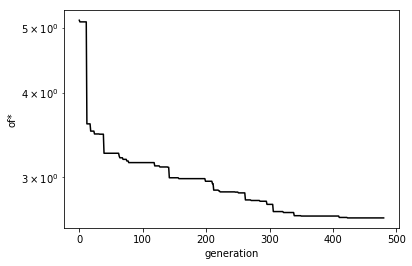

Generation 490 | OF mean 6.609e+02 | Best OF 2.612e+00


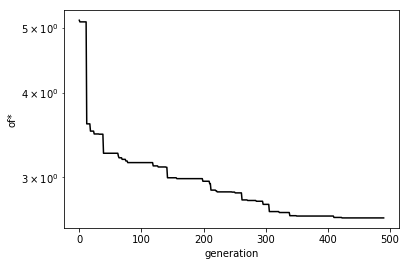

Generation 500 | OF mean 6.409e+02 | Best OF 2.612e+00


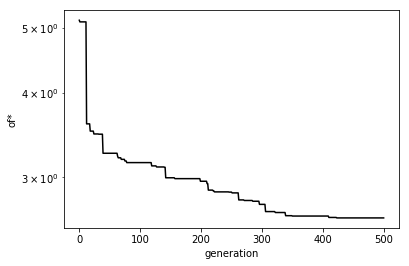

Generation 510 | OF mean 6.012e+02 | Best OF 2.612e+00


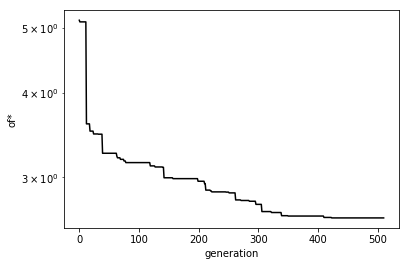

Generation 520 | OF mean 6.908e+02 | Best OF 2.612e+00


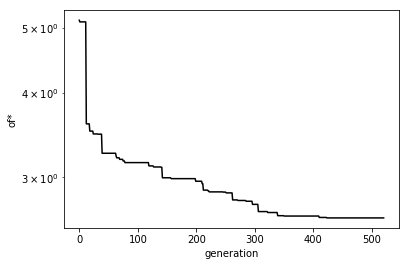

Generation 530 | OF mean 6.609e+02 | Best OF 2.612e+00


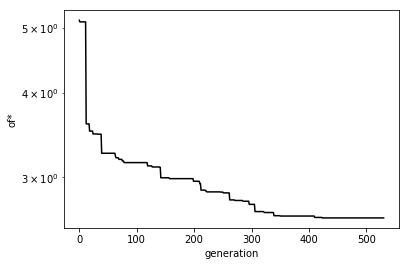

Generation 540 | OF mean 6.113e+02 | Best OF 2.612e+00


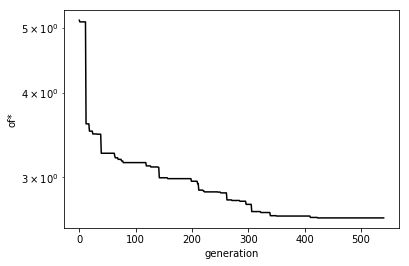

Generation 550 | OF mean 6.510e+02 | Best OF 2.612e+00


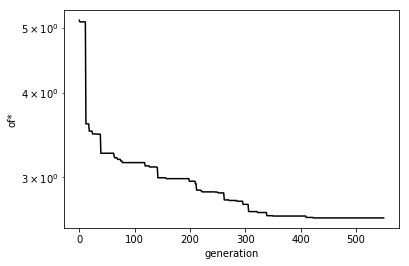

Generation 560 | OF mean 6.708e+02 | Best OF 2.612e+00


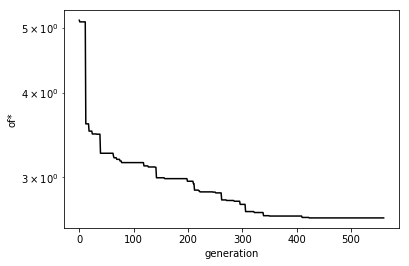

Generation 570 | OF mean 6.707e+02 | Best OF 2.612e+00


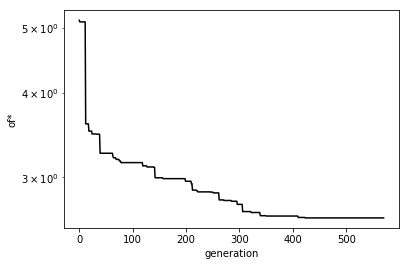

Generation 580 | OF mean 7.504e+02 | Best OF 2.612e+00


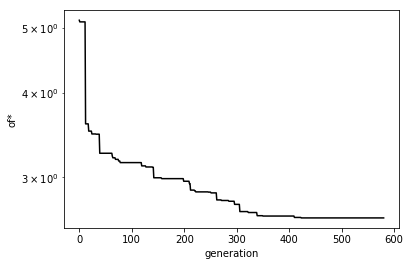

Generation 590 | OF mean 7.104e+02 | Best OF 2.612e+00


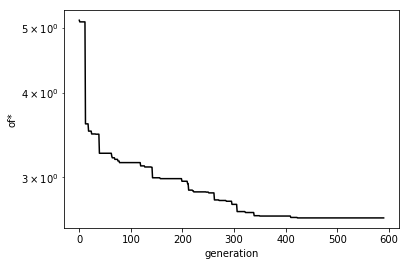

Generation 600 | OF mean 7.305e+02 | Best OF 2.612e+00


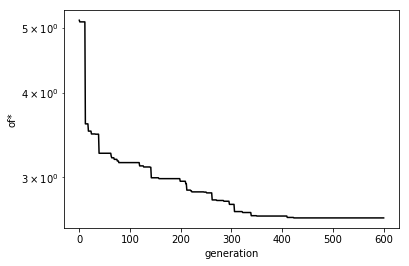

Generation 610 | OF mean 7.304e+02 | Best OF 2.612e+00


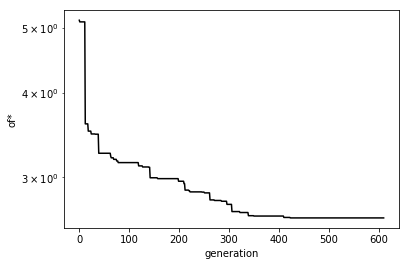

Generation 620 | OF mean 6.809e+02 | Best OF 2.612e+00


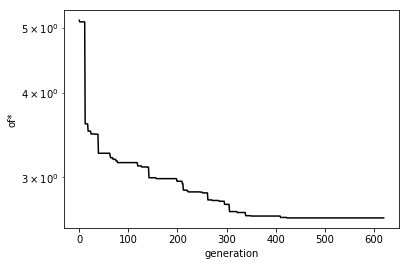

Generation 630 | OF mean 7.306e+02 | Best OF 2.612e+00


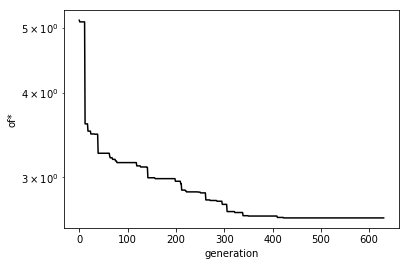

Generation 640 | OF mean 7.305e+02 | Best OF 2.612e+00


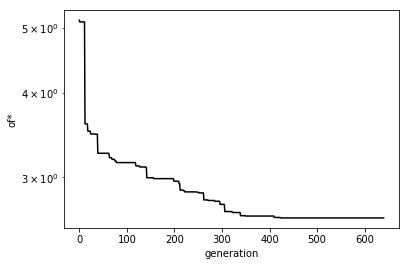

Generation 650 | OF mean 6.015e+02 | Best OF 2.612e+00


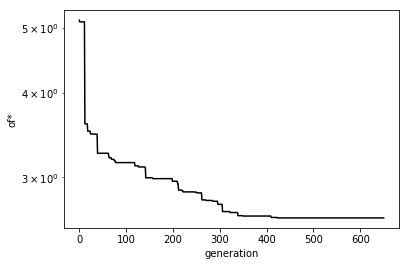

Generation 660 | OF mean 6.808e+02 | Best OF 2.612e+00


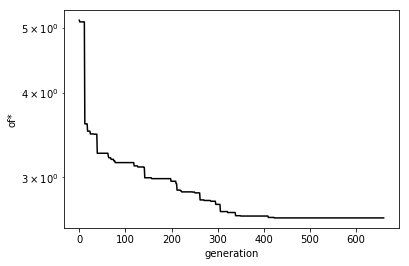

Generation 670 | OF mean 7.306e+02 | Best OF 2.612e+00


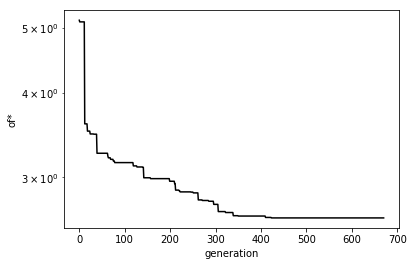

Generation 680 | OF mean 7.008e+02 | Best OF 2.612e+00


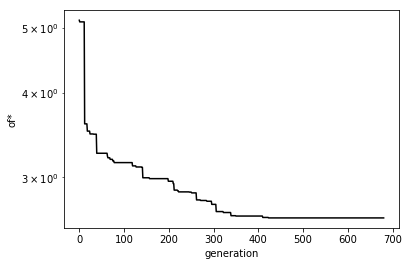

Generation 690 | OF mean 6.709e+02 | Best OF 2.612e+00


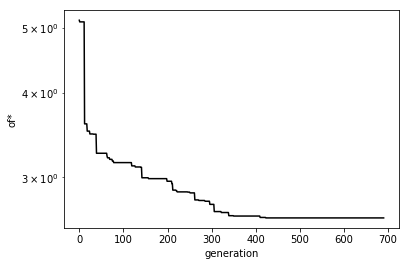

Generation 700 | OF mean 6.212e+02 | Best OF 2.612e+00


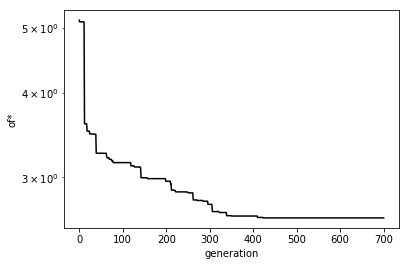

Generation 710 | OF mean 5.016e+02 | Best OF 2.612e+00


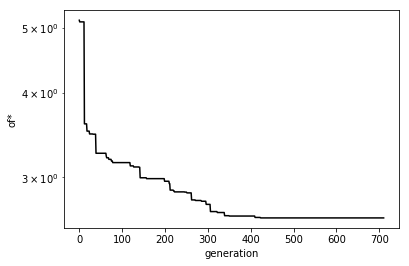

Generation 720 | OF mean 6.307e+02 | Best OF 2.612e+00


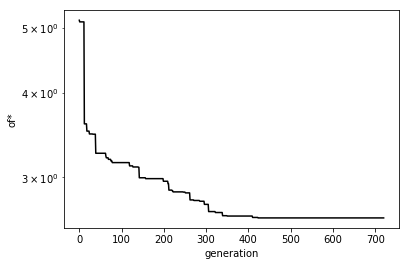

Generation 730 | OF mean 5.515e+02 | Best OF 2.612e+00


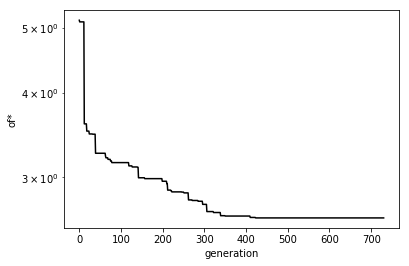

Generation 740 | OF mean 7.006e+02 | Best OF 2.607e+00


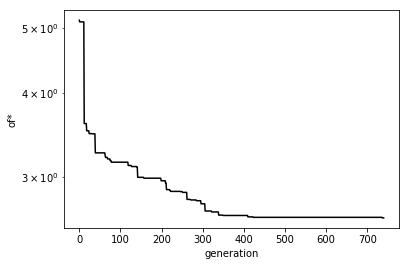

Generation 750 | OF mean 5.516e+02 | Best OF 2.607e+00


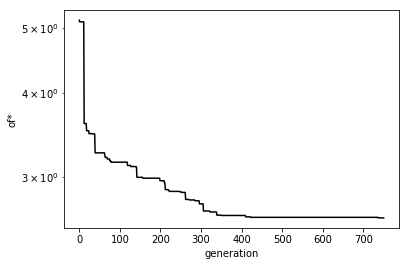

Generation 760 | OF mean 5.914e+02 | Best OF 2.607e+00


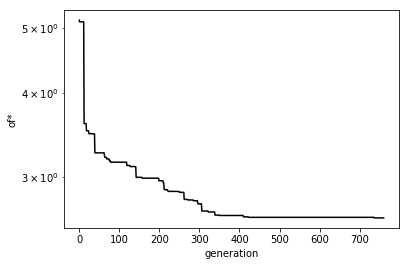

Generation 770 | OF mean 5.314e+02 | Best OF 2.607e+00


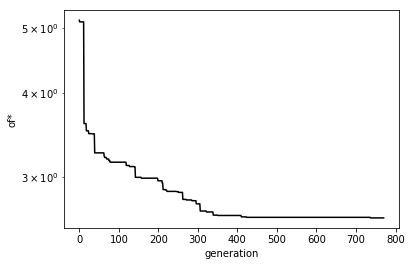

Generation 780 | OF mean 4.917e+02 | Best OF 2.595e+00


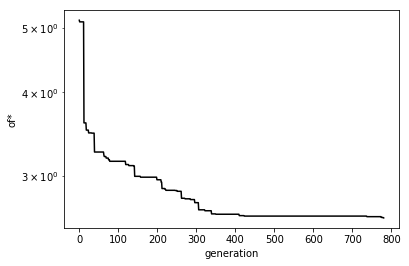

Generation 790 | OF mean 5.017e+02 | Best OF 2.595e+00


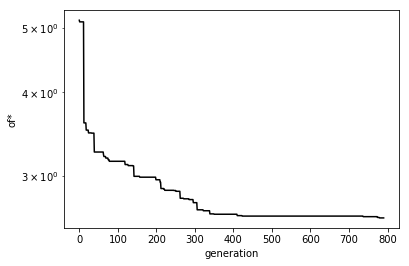

<Figure size 432x288 with 0 Axes>

In [15]:
ga.Optimize(varRange,fToOptimize,{'constraints':[],'maxmin':'min','plotResults':True})

In [15]:
timeStr = '{0:%Y%m%d%H%M}'.format(datetime.datetime.now())
NNO =load_model('201905171224_Model_optimised.hd5')
#NNO = UT.SetWeightsIntoNN(ga.varOptimal,model)
#from keras.models import load_model
#NNO.save('%s_Model_optimised.hd5' % timeStr)

In [17]:
#NNO2 = UT.SetWeightsIntoNN(ga.history['varOptimal'][-1],vehicleForGA.ControllerNN)

45
completed simulation 11013.228000000074 44.782881029815734


Text(0.5, 1.0, 'NEDC Charge Sustained. fCons = 1.664')

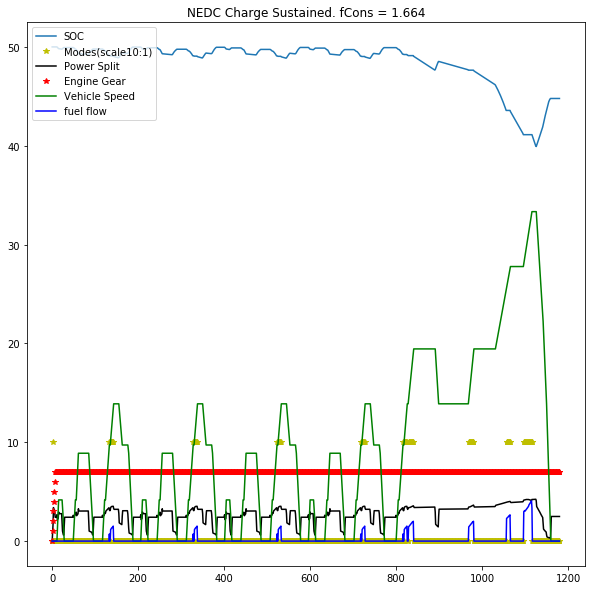

In [16]:
# Charge charge sustain test
if not(NNO): NNO =load_model('201905161545_Model_optimised.hd5')
vehicleForGAOptmized = PHEV(velFile,NNO,{'SOC_init':50,'SOC_target':45,'SOC_min':20}) #{'SOC_init':15,'SOC_target':15,'SOC_min':10})
print(vehicleForGAOptmized.SOC_target)
vehicleForGAOptmized.RunSimulation()
plt.figure(figsize=(10,10))
plt.plot(vehicleForGAOptmized.soc,label = 'SOC')
plt.plot(vehicleForGAOptmized.mode*10,'y*', label = 'Modes(scale10:1)')
plt.plot(vehicleForGAOptmized.beta*10,'k', label = 'Power Split')
plt.plot(vehicleForGAOptmized.engGear,'r*', label = 'Engine Gear')
plt.plot(vehicleForGAOptmized.vehSpeed,'g-',label='Vehicle Speed')
plt.plot(vehicleForGAOptmized.fuelFlow*1000,'b-',label='fuel flow')
plt.legend(loc='upper left')

plt.title('NEDC Charge Sustained. fCons = %.3f' % (vehicleForGAOptmized.fuelFlow.sum()*1000*100/vehicleForGAOptmized.x[-1]))
# plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\combine',dpi=300)

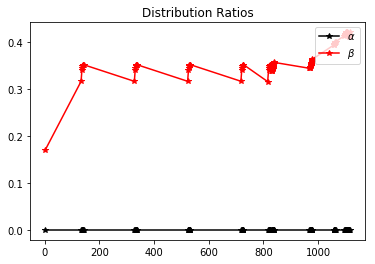

In [41]:
iAlpha = vehicleForGAOptmized.mode==1
iBeta = vehicleForGAOptmized.mode==1

plt.plot(vehicleForGAOptmized.time[iAlpha],vehicleForGAOptmized.alpha[iAlpha],'k*-',label=r'$\alpha$')
plt.plot(vehicleForGAOptmized.time[iBeta],vehicleForGAOptmized.beta[iBeta],'r-*',label=r'$\beta$')
# plt.plot(vehicleForGAOptmized.mode*10)
plt.legend(loc='upper right')
plt.title('Distribution Ratios')
plt.savefig(r'D:\Master Thesis\project tech files\Final Files\17_05_phev\Distirbution Power',dpi=300)

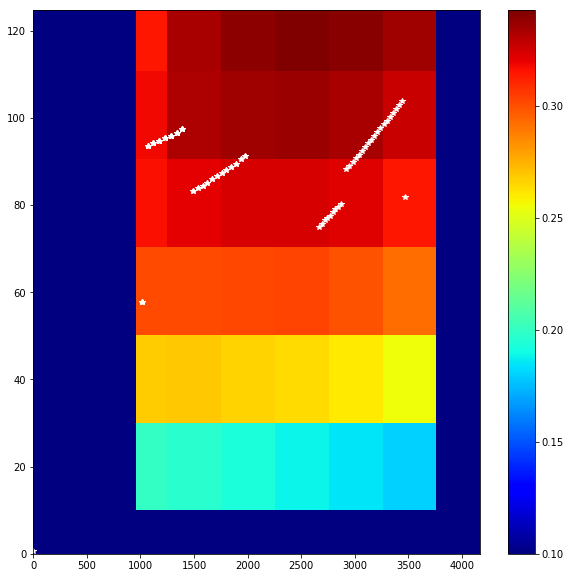

In [42]:
iPos = vehicleForGAOptmized.mode==1
xx,yy = np.meshgrid(np.linspace(0,vehicleForGAOptmized.engRPM.max()*1.2,200),np.linspace(0,vehicleForGAOptmized.engTorque.max()*1.2,100))
plt.figure(figsize=(10,10))
plt.pcolor(xx,yy,vehicleForGAOptmized.EngineMap(xx.ravel(),yy.ravel()).reshape(xx.shape),cmap='jet')
plt.colorbar()
plt.plot(vehicleForGAOptmized.engRPM[iPos],vehicleForGAOptmized.engTorque[iPos],'*w')
# plt.figure(5)
# plt.plot(vhc.engEff*100,label='eff')
# plt.plot(vhc.engTorque,label='torque')

# plt.plot(vehicleForGAOptmized.engRPM/100,label='rpm')
# plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\engine efficieny points in engine map',dpi=300)

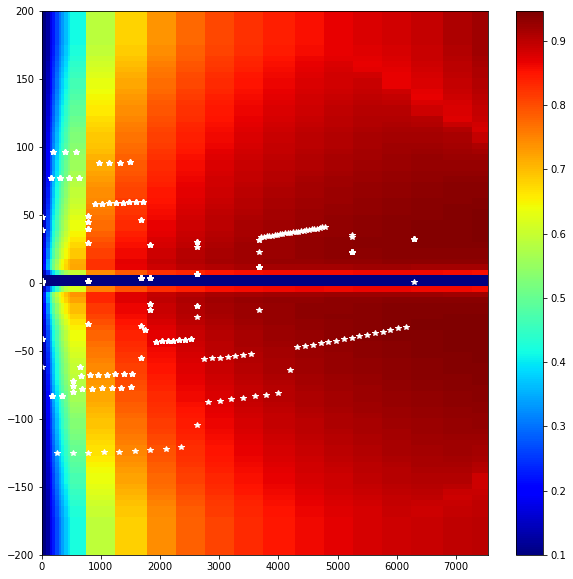

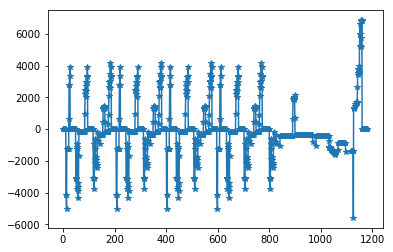

In [20]:
xx,yy = np.meshgrid(np.linspace(0,vehicleForGAOptmized.emRPM.max()*1.2,200),np.linspace(-200,200,100))
iPos = vehicleForGAOptmized.mode==0
plt.figure(figsize=(10,10))
plt.pcolor(xx,yy,vehicleForGAOptmized.MotorMap(xx.ravel(),yy.ravel()).reshape(xx.shape),cmap='jet')
plt.colorbar()
plt.plot(vehicleForGAOptmized.emRPM[iPos],vehicleForGAOptmized.emTorque[iPos],'*w')
plt.savefig(r'D:\Master Thesis\project tech files\Final Files\17_05_phev\motor efficieny points in motor map',dpi=300)
plt.figure(5)
plt.plot(vehicleForGAOptmized.time[iPos],vehicleForGAOptmized.powerMech[iPos]-vehicleForGAOptmized.powerEm[iPos],'*-',label='rpm')


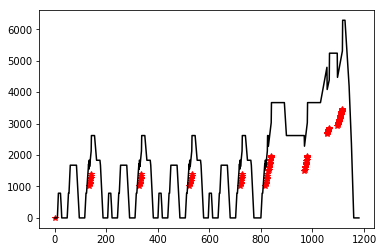

In [21]:
ipos= vehicleForGAOptmized.mode==1
plt.plot(vehicleForGAOptmized.time[ipos],vehicleForGAOptmized.engRPM[ipos],'r*')
#jpos = vehicleForGAOptmized.mode==0
plt.plot(vehicleForGAOptmized.time,vehicleForGAOptmized.emRPM,'k-')

Text(0.5, 1.0, 'Operating Modes')

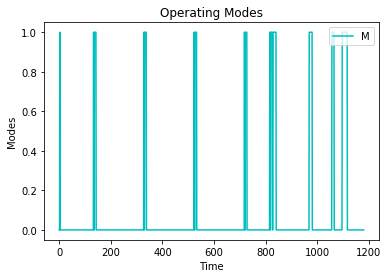

In [22]:
plt.plot(vehicleForGAOptmized.mode,'c')
plt.legend(('Modes'),loc='upper right')
plt.xlabel('Time')
plt.ylabel('Modes')
plt.title('Operating Modes')
# plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Power Distribution Ratios',dpi=300)

Text(0.5, 1.0, 'NEDC Charge Sustained. fCons = 1.664')

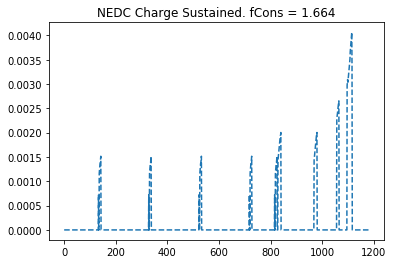

In [23]:
plt.plot(vehicleForGAOptmized.fuelFlow,'--')
plt.title('NEDC Charge Sustained. fCons = %.3f' % (vehicleForGAOptmized.fuelFlow.sum()*1000*100/vehicleForGAOptmized.x[-1]))
# plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\fuel consumption',dpi=300)

45
completed simulation 11013.228000000074 44.782881029815734


Text(0.5, 1.0, 'NEDC Charge Depletion')

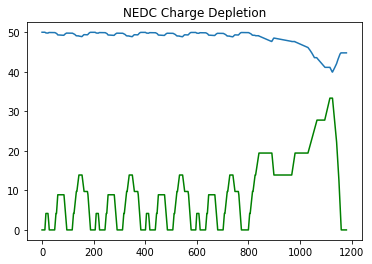

In [24]:
# Charge depletion test
# iPos = vehicleForGAOptmized.mode==2
print(vehicleForGAOptmized.SOC_target)
vehicleForGAOptmized.RunSimulation()
plt.plot(vehicleForGAOptmized.vehSpeed,'g-')
plt.plot(vehicleForGAOptmized.time,vehicleForGAOptmized.soc)
# plt.plot(vehicleForGAOptmized.mode)
plt.title('NEDC Charge Depletion')
# plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\soc_vehspeed',dpi=300)

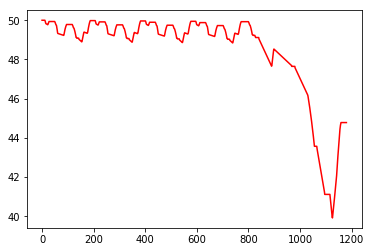

In [25]:
plt.plot(vehicleForGAOptmized.soc,'r-')
# plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\soc',dpi=300)

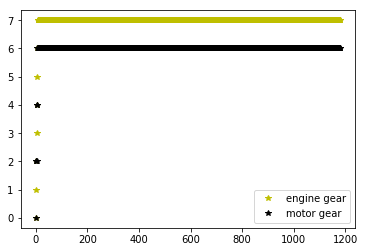

In [26]:
plt.plot(vehicleForGAOptmized.engGear,'y*')
plt.plot(vehicleForGAOptmized.emGear,'k*')
plt.legend(('engine gear','motor gear'),loc='lower right')
# plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\gears',dpi=300)

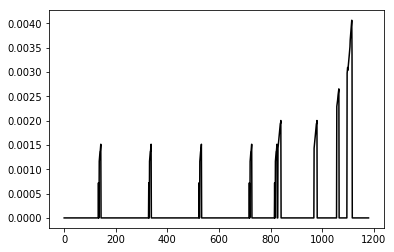

In [27]:
plt.plot(vehicleForGAOptmized.fuelFlow,'k',label=r'fuel flow')

# plt.savefig(r'C:\\SVN\\FEoP\\Trunk_Branch_Tag\\3_Automaker\\Branches\\nishwa_coding\\Optimizer\\UnitTest\\fuel_flow',dpi=300)

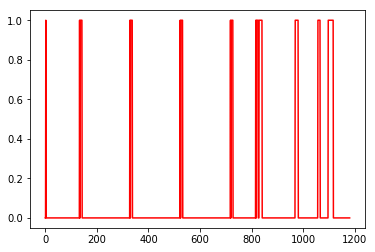

In [28]:
plt.plot(vehicleForGAOptmized.mode,'r-')
# plt.savefig(r'C:\\SVN\\FEoP\\Trunk_Branch_Tag\\3_Automaker\\Branches\\nishwa_coding\\Optimizer\\UnitTest\\GA_OPTIMAL_IMAGES\\modes',dpi=300)

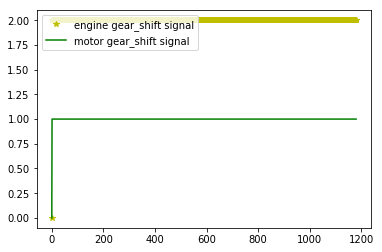

In [129]:
plt.plot(vehicleForGAOptmized.emShiftGear,'y*')
plt.plot(vehicleForGAOptmized.engShiftGear,'g-')
plt.legend(('engine gear_shift signal','motor gear_shift signal'),loc='upper left')
# plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\gears_shift',dpi=300)

In [130]:
vehicleForGAOptmized = PHEV(velFile,NNO,{'SOC_init':15,'SOC_target':15,'SOC_min':10})
vehicleForGAOptmized.RunSimulation()

completed simulation 11013.228000000074 15.015867412410104


In [29]:
vehicleForGAOptmized.nGears

7

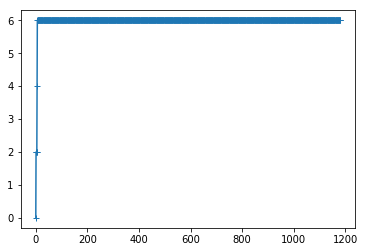

In [30]:
plt.plot(vehicleForGAOptmized.emGear,'+-')

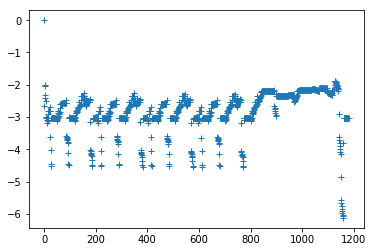

In [31]:
plt.plot(vehicleForGAOptmized.outputNN[:,1]*-1,'+')

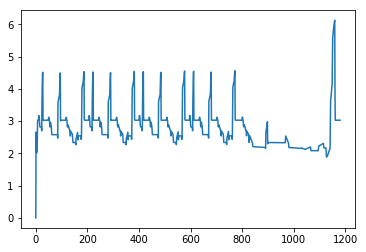

In [32]:
plt.plot(vehicleForGAOptmized.outputNN[:,1])

In [ ]:

plt.savefig(r'C:\\SVN\\FEoP\\Trunk_Branch_Tag\\3_Automaker\\Branches\\nishwa_coding\\Optimizer\\UnitTest\\GA_OPTIMAL_IMAGES\\FUELconsump',dpi=300)

plt.savefig(r'C:\\SVN\\FEoP\\Trunk_Branch_Tag\\3_Automaker\\Branches\\nishwa_coding\\Optimizer\\UnitTest\\GA_OPTIMAL_IMAGES\\modes',dpi=300)

plt.savefig(r'C:\\SVN\\FEoP\\Trunk_Branch_Tag\\3_Automaker\\Branches\\nishwa_coding\\Optimizer\\UnitTest\\GA_OPTIMAL_IMAGES\\FUELconsump',dpi=300)
plt.savefig(r'C:\\SVN\\FEoP\\Trunk_Branch_Tag\\3_Automaker\\Branches\\nishwa_coding\\Optimizer\\UnitTest\\GA_OPTIMAL_IMAGES\\combine plot',dpi=300)

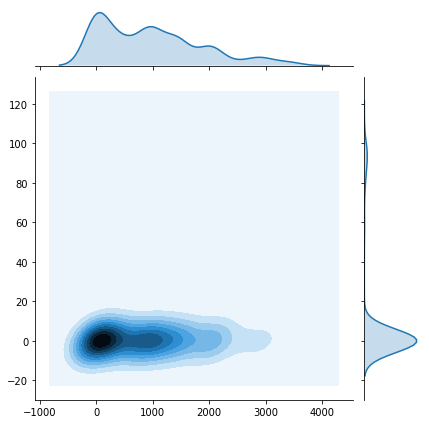

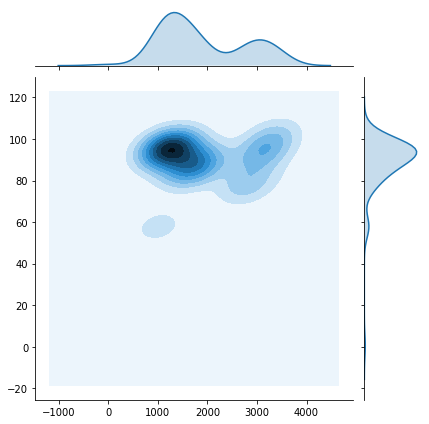

In [120]:
sns.jointplot(vehicleForGAOptmized.engRPM,vehicleForGAOptmized.engTorque,kind="kde")
sns.jointplot(vehicleForGAOptmized.engRPM[iPos],vehicleForGAOptmized.engTorque[iPos],kind='kde')

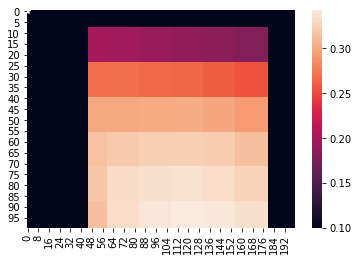

In [133]:
sns.heatmap(vehicleForGAOptmized.EngineMap(xx.ravel(),yy.ravel()).reshape(xx.shape))
plt.plot(vehicleForGAOptmized.engRPM[iPos],vehicleForGAOptmized.engTorque[iPos],'w*')